# Individual Assignment. Exploratory Data Analysis





In part 1 of this assignment, we will focus on exploratory data analysis of stock prices. Keep in mind, this assignment is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is challenging and you have to look things up on your own to try to solve the tasks issued. **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2017.

# Part 1


## Get the Data

In this section we will learn how to use pandas to directly read data from Yahoo finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**).*

### The Imports


In [1]:
!pip install pandas-datareader
!pip install --upgrade pandas
import pandas as pd
import numpy as np
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data, wb

import datetime
%matplotlib inline

Requirement already up-to-date: pandas in c:\users\tatiksha\anaconda3\lib\site-packages (0.25.3)


## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2016 to Jan 1st 2017 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)


In [3]:
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2017, 1, 1)

In [4]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [4]:
WFC.reset_index(inplace=True)
WFC["Date"].value_counts()

2016-09-08    1
2016-03-08    1
2016-07-07    1
2016-09-07    1
2016-11-08    1
             ..
2016-06-08    1
2016-08-09    1
2016-09-09    1
2016-10-10    1
2016-08-08    1
Name: Date, Length: 252, dtype: int64

In [8]:
# Could also do this for a Panel Object
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)


In [5]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker        BAC                                                   \
Stock Info        High    Low       Open  Close       Volume  Adj Close   
Date                                                                      
2016-01-04   16.490000  16.25  16.450001  16.43  114888000.0  15.373302   
2016-01-05   16.590000  16.23  16.520000  16.43   66670000.0  15.373302   
2016-01-06   16.290001  16.02  16.190001  16.08  102760800.0  15.045812   
2016-01-07   15.900000  15.44  15.730000  15.50  116255900.0  14.503113   
2016-01-08   15.940000  15.16  15.940000  15.20  124782400.0  14.222406   

Bank Ticker          C                                   ...         MS  \
Stock Info        High        Low       Open      Close  ...       Open   
Date                                                     ...              
2016-01-04   51.189999  50.189999  50.750000  51.130001  ...  30.700001   
2016-01-05   51.610001  50.410000  51.540001  50.860001  ...  31.480000   
2016-01-06   50.580002  49.759998  50.099998  50.119999  ...  30.629999   
2016-01-07   49.380001  47.500000  49.070000  47.560001  ...  29.879999   
2016-01-08   48.740002  46.029999  48.730000  46.130001  ...  29.410000   

Bank Ticker                                          WFC             \
Stock Info       Close      Volume  Adj Close       High        Low   
Date                                                                  
2016-01-04   31.480000  15749200.0  28.655018  53.270000  52.299999   
2016-01-05   31.280001   9850500.0  28.472967  53.270000  52.549999   
2016-01-06   30.500000  13057400.0  27.762959  52.619999  51.830002   
2016-01-07   28.980000  18138200.0  26.379364  51.189999  50.150002   
2016-01-08   28.379999  15295600.0  25.833206  50.860001  49.459999   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2016-01-04   53.090000  52.910000  25985400.0  46.564404  
2016-01-05   52.930000  52.889999  14759600.0  46.546799  
2016-01-06   52.119999  51.880001  20026400.0  45.657928  
2016-01-07   51.009998  50.400002  30425600.0  44.355438  
2016-01-08   50.799999  49.560001  22981400.0  43.616177  

[5 rows x 36 columns]

##### Add a Column_Company Name (this is filled out for you)

In [10]:
BAC["Company"]='BOA'
C["Company"]='Citi'
GS["Company"]='GoldmanSachs'
JPM["Company"]='JPMorgan'
MS["Company"]='MorganStanley'
WFC["Company"]='WellsFargo'

In [11]:
df.head()

Attributes  Adj Close                                                          \
Symbols           BAC          C          GS        JPM         MS        WFC   
Date                                                                            
2016-01-04  15.373302  47.502300  167.424698  57.331673  28.655018  46.564404   
2016-01-05  15.373302  47.251461  164.541977  57.430794  28.472967  46.546799   
2016-01-06  15.045812  46.563961  160.525070  56.601742  27.762959  45.657928   
2016-01-07  14.503113  44.185600  155.591339  54.312798  26.379364  44.355438   
2016-01-08  14.222406  42.857063  154.948654  53.096230  25.833206  43.616177   

Attributes  Close                                    ...        Open  \
Symbols       BAC          C          GS        JPM  ...          GS   
Date                                                 ...               
2016-01-04  16.43  51.130001  177.139999  63.619999  ...  175.789993   
2016-01-05  16.43  50.860001  174.089996  63.730000  ...  176.710007   
2016-01-06  16.08  50.119999  169.839996  62.810001  ...  171.309998   
2016-01-07  15.50  47.560001  164.619995  60.270000  ...  166.669998   
2016-01-08  15.20  46.130001  163.940002  58.919998  ...  166.750000   

Attributes                                        Volume              \
Symbols           JPM         MS        WFC          BAC           C   
Date                                                                   
2016-01-04  63.950001  30.700001  53.090000  114888000.0  23440200.0   
2016-01-05  63.700001  31.480000  52.930000   66670000.0  17444900.0   
2016-01-06  62.720001  30.629999  52.119999  102760800.0  22501800.0   
2016-01-07  61.459999  29.879999  51.009998  116255900.0  37902900.0   
2016-01-08  61.130001  29.410000  50.799999  124782400.0  30643000.0   

Attributes                                                 
Symbols            GS         JPM          MS         WFC  
Date                                                       
2016-01-04  3745500.0  25393200.0  15749200.0  25985400.0  
2016-01-05  4521600.0  16566700.0   9850500.0  14759600.0  
2016-01-06  5539400.0  22961500.0  13057400.0  20026400.0  
2016-01-07  5687900.0  27630900.0  18138200.0  30425600.0  
2016-01-08  4929800.0  22373300.0  15295600.0  22981400.0  

[5 rows x 36 columns]

##### Draw the closing prices of BAC

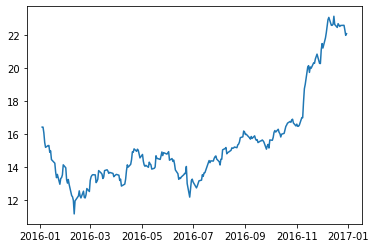

In [13]:
# your code here
import matplotlib.pyplot as plt
all_close=bank_stocks.xs(key='Close',axis=1,level='Stock Info')
cprice= all_close.BAC
plt.plot(cprice)

##### Append all the data sets

In [14]:
# your code here
adata = pd.concat([BAC,C,GS,JPM,MS,WFC])
adata

,High,Low,Open,Close,Volume,Adj Close,Company
Date,,,,,,,
2016-01-04,16.490000,16.250000,16.450001,16.430000,114888000.0,15.373302,BOA
2016-01-05,16.590000,16.230000,16.520000,16.430000,66670000.0,15.373302,BOA
2016-01-06,16.290001,16.020000,16.190001,16.080000,102760800.0,15.045812,BOA
2016-01-07,15.900000,15.440000,15.730000,15.500000,116255900.0,14.503113,BOA
2016-01-08,15.940000,15.160000,15.940000,15.200000,124782400.0,14.222406,BOA
...,...,...,...,...,...,...,...
2016-12-23,55.980000,55.619999,55.779999,55.959999,8313000.0,50.831436,WellsFargo
2016-12-27,56.099998,55.840000,55.900002,55.950001,8893900.0,50.822350,WellsFargo
2016-12-28,56.080002,55.270000,55.980000,55.320000,10609100.0,50.250080,WellsFargo


##### Derive the average closing price for each bank

In [17]:
# your code here
avg= df['Close'].mean()
avg
#or bank_stocks.xs(key='Close',axis=1,level='Stock Info').mean() 

Symbols
BAC     15.431905
C       46.386111
GS     169.113809
JPM     65.622817
MS      29.848135
WFC     48.957381
dtype: float64

##### Plot the average closing price for each bank using matplotlib or plotly and cufflinks


[Text(0, 0, 'BAC'),
 Text(0, 0, 'C'),
 Text(0, 0, 'GS'),
 Text(0, 0, 'JPM'),
 Text(0, 0, 'MS'),
 Text(0, 0, 'WFC')]

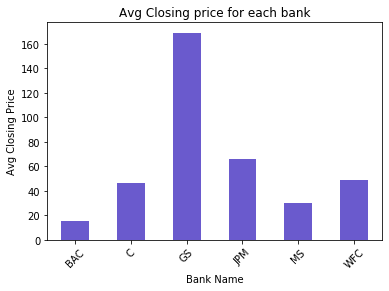

In [26]:
# your code here
viz_1=avg.plot(kind='bar', color='slateblue')
viz_1.set_title('Avg Closing price for each bank')
viz_1.set_ylabel('Avg Closing Price')
viz_1.set_xlabel('Bank Name')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)


** What is the max Close price for each bank's stock throughout the time period?**

In [27]:
# your code here
df['Close'].max()

Symbols
BAC     23.160000
C       61.090000
GS     243.089996
JPM     87.129997
MS      43.730000
WFC     57.290001
dtype: float64

** Create a new dataframe called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

** We can use pandas pct_change() method on the Close column to create a new dataframe representing this return value. Use .groupby().**

In [34]:
# your code here
returns = pd.DataFrame()
for bank in tickers:
    returns[bank + " Return"]=bank_stocks[bank]["Close"].pct_change()

In [35]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.000000,-0.005281,-0.017218,0.001729,-0.006353,-0.000378
2016-01-06,-0.021303,-0.014550,-0.024413,-0.014436,-0.024936,-0.019096
2016-01-07,-0.036070,-0.051077,-0.030735,-0.040439,-0.049836,-0.028527
2016-01-08,-0.019355,-0.030067,-0.004131,-0.022399,-0.020704,-0.016667


** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. Did anything significant happen that day?**

BAC Return   2016-06-24
C Return     2016-06-24
GS Return    2016-06-24
JPM Return   2016-06-24
MS Return    2016-06-24
WFC Return   2016-06-24
dtype: datetime64[ns]

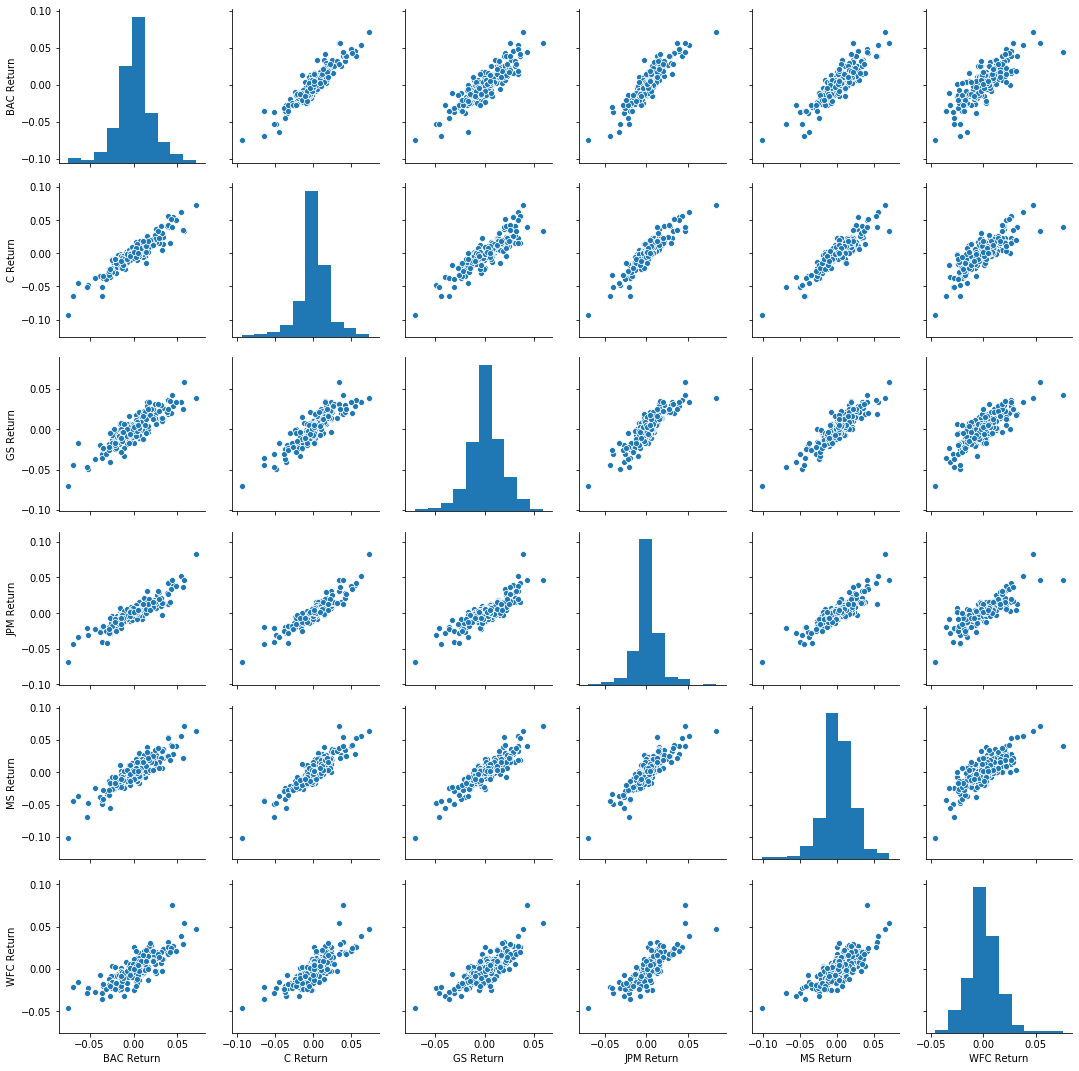

In [38]:
# your code here
import seaborn as sns
sns.pairplot(returns[1:])
#worst returns- Britain leaving the EU
returns.idxmin()

In [37]:
#best returns Trump elected president; Gravitational waves detected
returns.idxmax()

BAC Return   2016-02-12
C Return     2016-02-12
GS Return    2016-11-09
JPM Return   2016-02-12
MS Return    2016-11-09
WFC Return   2016-11-10
dtype: datetime64[ns]

** Please state here what you have noticed. Did anything significant happen in that time frame? **
worst returns- Britain leaving the EU 
best returns- Trump elected president; Gravitational waves detected

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? **

In [39]:
#  your code here Morgan Stanley has the highest max spread data of 0.020555
returns.std()

BAC Return    0.020209
C Return      0.020060
GS Return     0.016886
JPM Return    0.015472
MS Return     0.020555
WFC Return    0.015015
dtype: float64

** Which would you classify as the riskiest for the year 2016? **

In [50]:
# your code here - I would classify MS as the riskiest for 2016 since the spread of data is still more than other banks
returns['2016-01-01':'2016-12-31'].std() 

BAC Return    0.020209
C Return      0.020060
GS Return     0.016886
JPM Return    0.015472
MS Return     0.020555
WFC Return    0.015015
dtype: float64

** Create a density plot using any library you like to visualize the previous year's return for each bank **

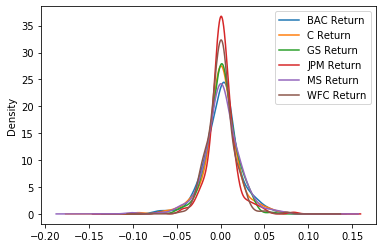

In [81]:
# your code here
returns['2016-01-01':'2016-12-31'].dropna().plot(kind='kde')

### Moving Averages

** Please derive the moving averages for these stocks in the year 2016. Use .rolling() in pandas to get the rolling average calculation. ** 



In [70]:
# your code here
c=bank_stocks.xs(key='Close',axis=1,level='Stock Info')
mavg=c.loc['2016-01-01':'2016-12-31'].rolling(window=30)

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2016**

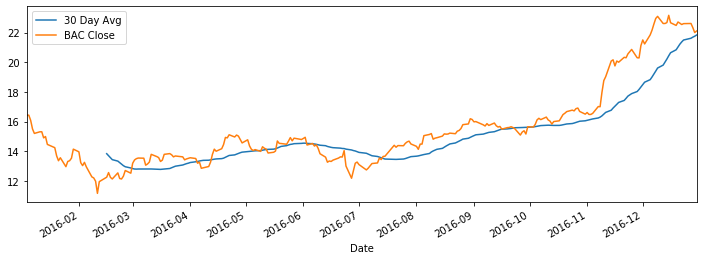

In [64]:
# your code here
plt.figure(figsize=(12,4))
BAC['Close'].loc['2016-01-01':'2016-12-31'].rolling(window=30).mean().plot(label="30 Day Avg")
BAC['Close'].loc['2016-01-01':'2016-12-31'].plot(label="BAC Close")
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**


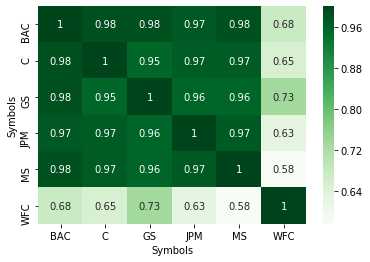

In [80]:
# your code here
sns.heatmap(df.Close.corr(),cmap="Greens",annot=True)

# Part 2. 

Please generate some visualization using the crunchbase database you downloaded for the midterm. Feel free to use any plotting packages (in Python), and generate any types of figures. You may also comment on the generated figures, and explain any insights you have obtained. 

In [84]:
import sqlite3
%reload_ext sql
%sql sqlite:///crunchbase_analysis.db
s = %sql SELECT * FROM crunchbase_companies LIMIT 100
df= pd.DataFrame(s)
df

 * sqlite:///crunchbase_analysis.db
Done.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,/company/8868,8868,http://www.8868.cn,None,NaN,operating,None,None,unknown,None,1.0,None,None,1
1,/company/21e6,2.10E+07,None,None,5050000.0,operating,USA,CA,SF Bay,San Francisco,1.0,1/1/13,2013-01-01,2
2,/company/club-domains,.Club Domains,http://dotclub.com,software,7000000.0,operating,USA,FL,Fort Lauderdale,Oakland Park,1.0,10/10/11,2011-10-10,3
3,/company/fox-networks,.Fox Networks,http://www.dotfox.com,advertising,4912394.0,closed,ARG,None,Buenos Aires,Buenos Aires,1.0,None,None,4
4,/company/a-list-games,[a]list games,http://www.alistgames.com,games_video,9300000.0,operating,None,None,unknown,None,1.0,None,None,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,/company/360learning,360Learning,http://360learning.com/fr,education,1543920.0,operating,FRA,None,Paris,Paris,1.0,1/1/10,2010-01-01,96
96,/company/gazaro,360pi,http://www.360pi.com,software,4100000.0,operating,CAN,None,Ottawa,Ottawa,2.0,7/1/07,2007-07-01,97
97,/company/365scores,365Scores,http://biz.365scores.com,mobile,1200000.0,operating,USA,None,United States - Other,None,1.0,None,None,98
98,/company/365webcall,365webcall,http://www.365webcall.com,None,NaN,operating,None,None,unknown,None,1.0,None,None,99


In [94]:
s2=%sql SELECT * FROM crunchbase_acquisitions LIMIT 100
df2= pd.DataFrame(s2)
df2

 * sqlite:///crunchbase_analysis.db
Done.


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,/company/waywire,/company/magnify,Magnify,games_video,USA,NY,New York,New York,NaN,USD,10/17/13,2013-10-17 00:00:00,1
1,/company/1-nation-technology,/company/vology,Vology,other,None,None,unknown,None,NaN,USD,1/1/06,2006-01-01 00:00:00,2
2,/company/1-stop-financial-service-centers-of-a...,/company/confie-seguros,Confie Seguros,enterprise,USA,CA,Los Angeles,Buena Park,NaN,USD,2/3/14,2014-02-03 00:00:00,3
3,/company/1-800-contacts-2,/company/thomas-h-lee-partners,Thomas H. Lee Partners,None,USA,MA,Boston,Boston,NaN,USD,1/7/14,2014-01-07 00:00:00,4
4,/company/1000memories,/company/ancestry-com,Ancestry,ecommerce,USA,UT,Salt Lake City,Provo,NaN,USD,10/3/12,2012-10-03 00:00:00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,/company/aboutme,/company/tony-conrad-ryan-freitas,Tony Conrad & Ryan Freitas,None,None,None,unknown,None,NaN,USD,2/5/13,2013-02-05 00:00:00,96
96,/company/aboutweblogs,/company/b5media,b5media,news,CAN,None,Toronto,"Toronto, ON",NaN,USD,11/7/05,2005-11-07 00:00:00,97
97,/company/abovenet,/company/zayo-bandwidth,Zayo Bandwidth,network_hosting,USA,CO,Denver,Louisville,2.200000e+09,USD,3/19/12,2012-03-19 00:00:00,98
98,/company/abraxis-bioscience,/company/celgene,Celgene,biotech,USA,NJ,Summit,Summit,2.900000e+09,USD,6/30/10,2010-06-30 00:00:00,99


Text(0.5, 1.0, 'Distribution of Company Categories')

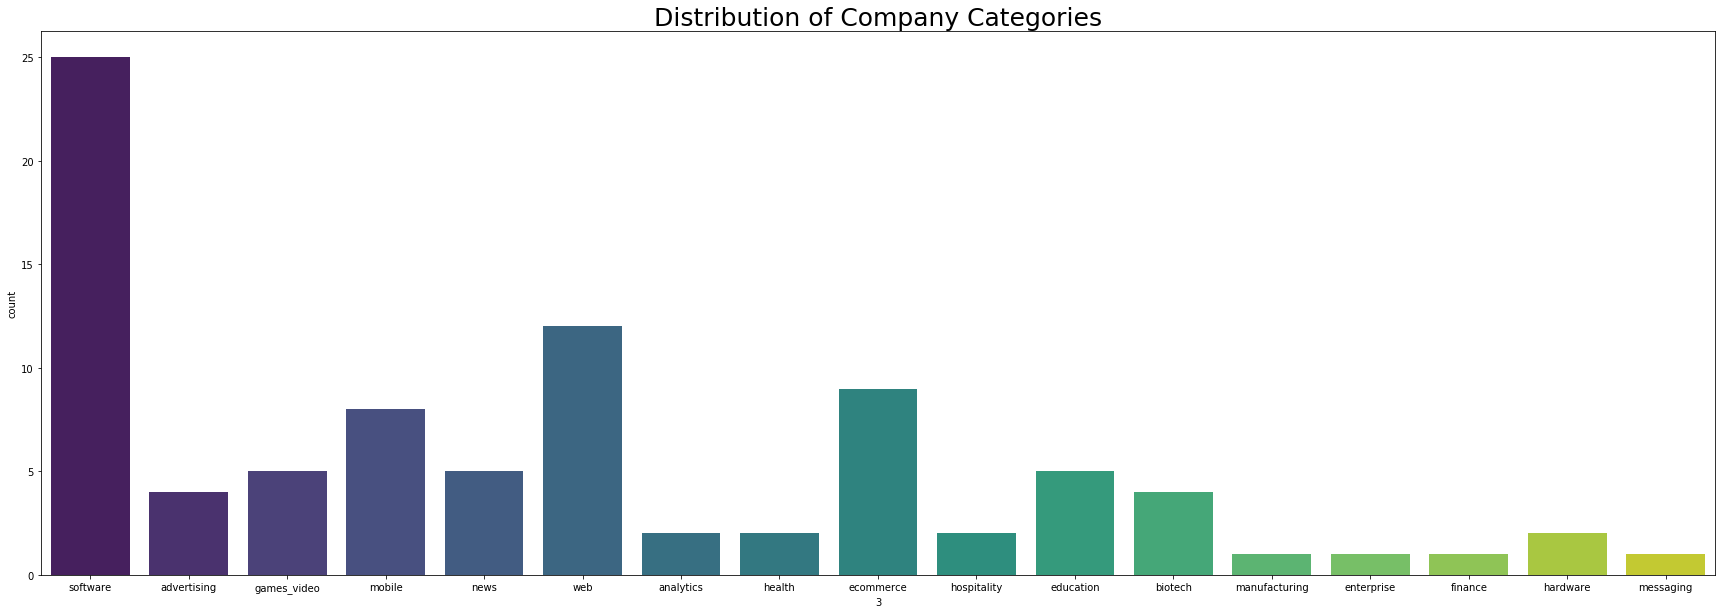

In [109]:
sns.countplot(df[3], palette="viridis")
fig2 = plt.gcf()
fig2.set_size_inches(30,10)
plt.title('Distribution of Company Categories', fontsize='25')

The majority of startup companies listed in the database operate in the Software, Web, and E-commerce industry. 
There is also a wide distribution of various industries represented from news to manufacturing and biotech. 

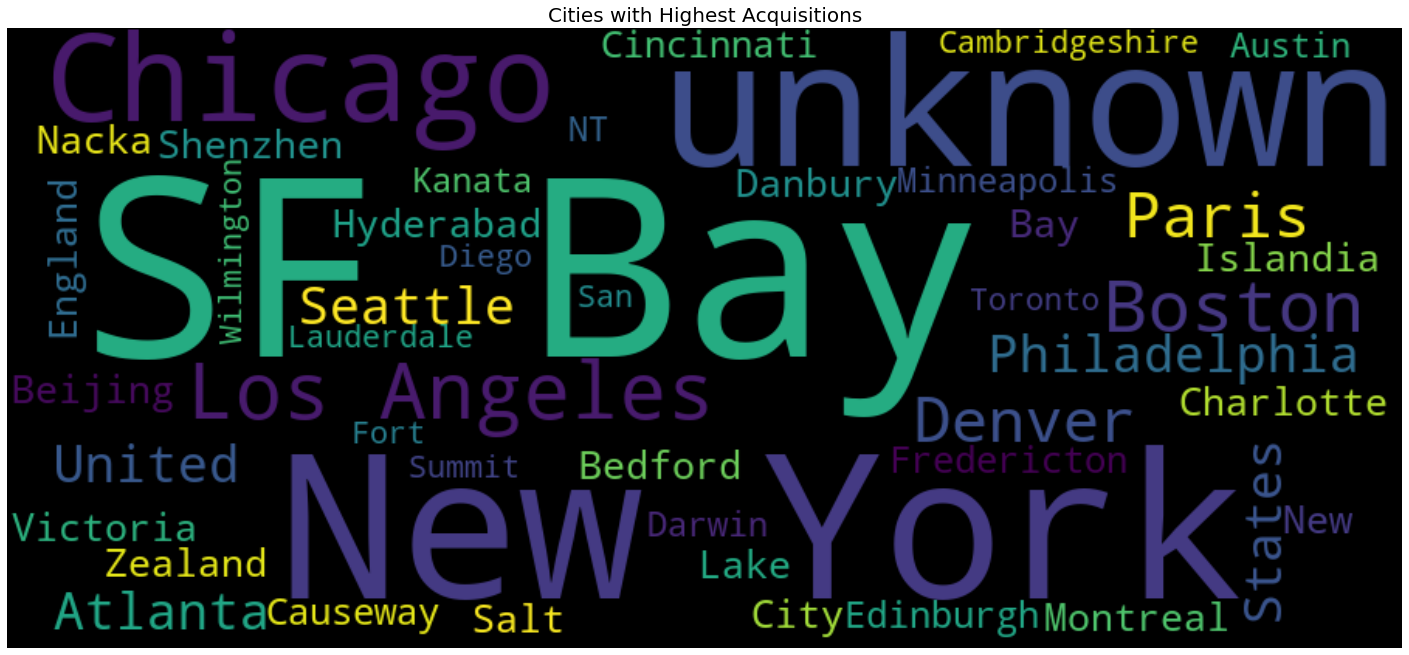

In [103]:
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=900,
                          height=400
                         ).generate(" ".join(df2[6]))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.title('Cities with Highest Acquisitions', fontsize='20')
plt.show()

The majority of company acquistions occurred in San Francisco-especially the Bay area which is not too surprising since a lot of successful startups operate in that area. The other two predominant cities with high acquisitions are New York and Chicago.

Text(0.5, 1.0, 'Distribution of Acquiring Company Industries')

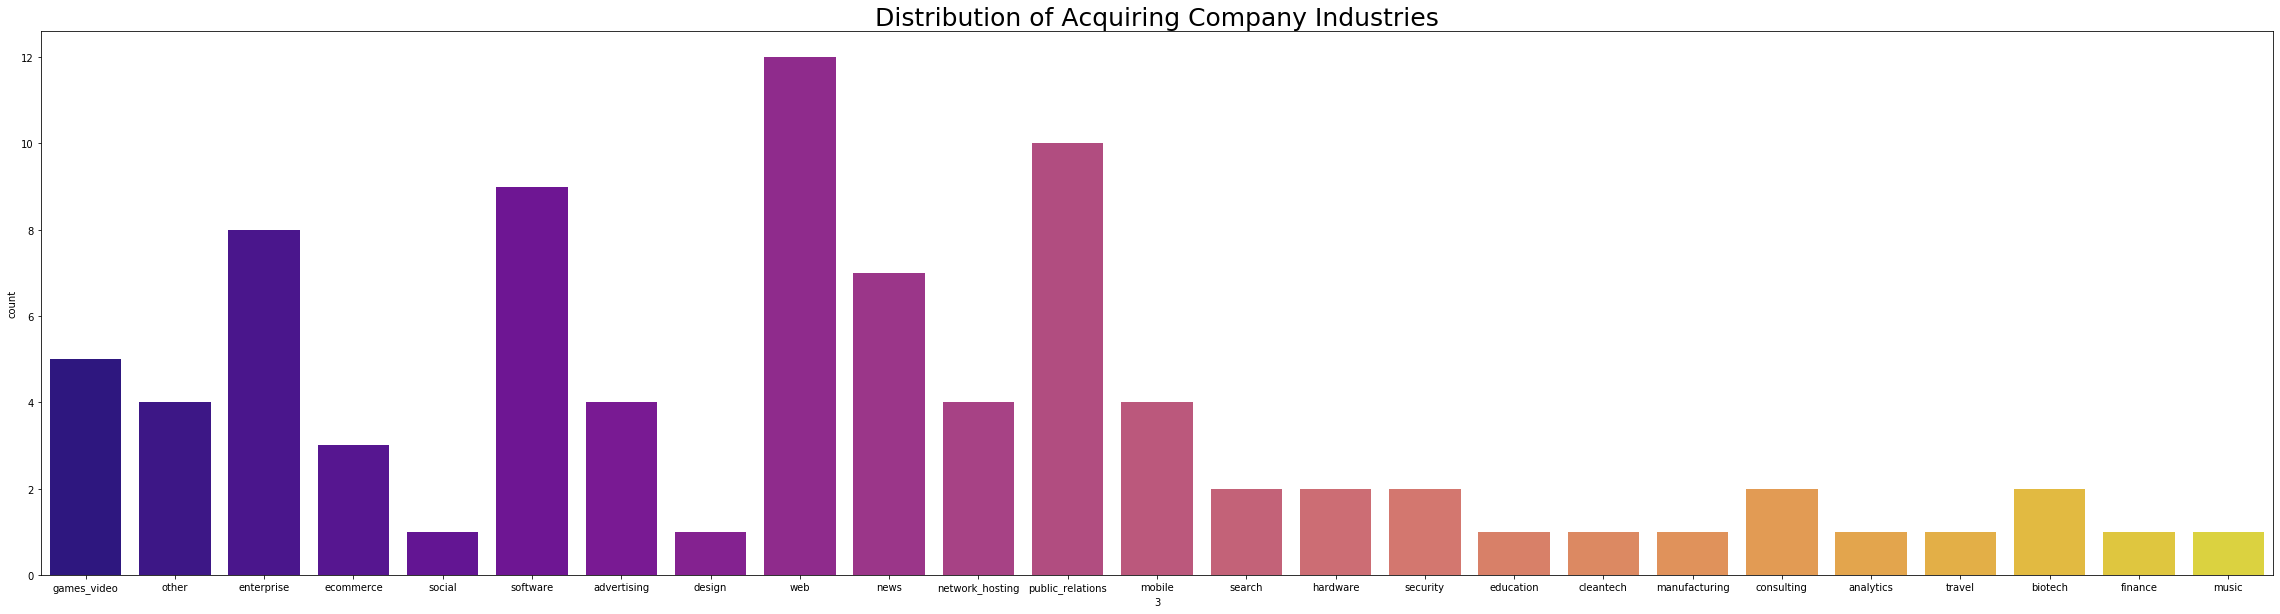

In [107]:
sns.countplot(df2[3], palette="plasma")
fig2 = plt.gcf()
fig2.set_size_inches(40,10)
plt.title('Distribution of Acquiring Company Industries', fontsize='25')

Compared to the prior distribution bar chart of various company industries, this bar chart varies substantially. The top 5 industries of acquiring companies are:
1. Web
2. Public Relations
3. Software
4. Enterprise
5. News

Software and Web are predominant industry for acquisitions (as are startups), however companies in the PR, Enterprise, and News Industry are also acquiring startups. 

# Great Job!
